In [1]:
!pip install kagglehub opencv-python matplotlib seaborn scikit-learn

In [2]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("klemenko/kitti-dataset")

print("Path to dataset files:", path)


100%|██████████| 22.5G/22.5G [09:33<00:00, 42.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/klemenko/kitti-dataset/versions/1


In [3]:
import os

# List available files/folders
print("Available subfolders:", os.listdir(path))


Available subfolders: ['data_object_label_2', 'data_object_image_2', 'data_object_calib', 'data_object_image_3']


# **Parse Image + Label Files and Visualize Bounding Boxes**

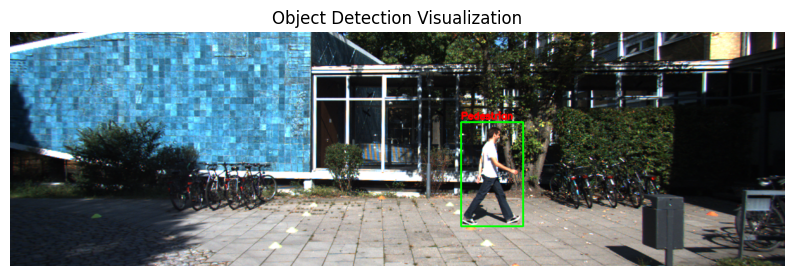

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Set paths
img_folder = os.path.join(path, 'data_object_image_2', 'training', 'image_2')
label_folder = os.path.join(path, 'data_object_label_2', 'training', 'label_2')

# Example file
img_file = '000000.png'
label_file = '000000.txt'

# Load image
img_path = os.path.join(img_folder, img_file)
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load label
label_path = os.path.join(label_folder, label_file)
with open(label_path, 'r') as file:
    labels = file.readlines()

# Draw bounding boxes
for label in labels:
    parts = label.split()
    obj_class = parts[0]
    x1, y1, x2, y2 = map(int, map(float, parts[4:8]))
    cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(image, obj_class, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

# Show image
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.title('Object Detection Visualization')
plt.axis('off')
plt.show()


# **Preprocess KITTI Images + Labels**

In [5]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

# Set folders
img_folder = os.path.join(path, 'data_object_image_2', 'training', 'image_2')
label_folder = os.path.join(path, 'data_object_label_2', 'training', 'label_2')

# List image files and choose a subset
img_files = sorted(os.listdir(img_folder))[:100]  # Use only first 100 for speed

print(f"Total selected images: {len(img_files)}")


Total selected images: 100


# **Preprocess into DataFrame (Image name, object class, bbox)**

In [6]:
# Create a DataFrame to store annotations
data = []

for img_file in tqdm(img_files, desc="Processing files"):
    img_id = img_file.split('.')[0]
    label_path = os.path.join(label_folder, f'{img_id}.txt')

    if not os.path.exists(label_path):
        continue

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        obj_class = parts[0]
        x1, y1, x2, y2 = map(float, parts[4:8])
        data.append({
            'image': img_file,
            'class': obj_class,
            'x1': x1,
            'y1': y1,
            'x2': x2,
            'y2': y2
        })

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()


Processing files: 100%|██████████| 100/100 [00:00<00:00, 21965.46it/s]


,image,class,x1,y1,x2,y2
0,000000.png,Pedestrian,712.40,143.00,810.73,307.92
1,000001.png,Truck,599.41,156.40,629.75,189.25
2,000001.png,Car,387.63,181.54,423.81,203.12
3,000001.png,Cyclist,676.60,163.95,688.98,193.93
4,000001.png,DontCare,503.89,169.71,590.61,190.13


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['x1'].plot(kind='hist', bins=20, title='x1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['y1'].plot(kind='hist', bins=20, title='y1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['x2'].plot(kind='hist', bins=20, title='x2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('image').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='x1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='x1', y='y1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='y1', y='x2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='x2', y='y2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['x1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('image')):
  _plot_series(series, series_name, i)
  fig.legend(title='image', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('x1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['x1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('class')):
  _plot_series(series, series_name, i)
  fig.legend(title='class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('x1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['y1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('image')):
  _plot_series(series, series_name, i)
  fig.legend(title='image', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('y1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['y1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('class')):
  _plot_series(series, series_name, i)
  fig.legend(title='class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('y1')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['x1'].plot(kind='line', figsize=(8, 4), title='x1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['y1'].plot(kind='line', figsize=(8, 4), title='y1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['x2'].plot(kind='line', figsize=(8, 4), title='x2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['class'].value_counts()
    for x_label, grp in _df_18.groupby('image')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('image')
_ = plt.ylabel('class')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['image'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='image', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['image'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='x1', y='image', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='x1', y='class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Filter to only specific classes (e.g., "Car", "Pedestrian")**

In [7]:
#Filter common classes
df = df[df['class'].isin(['Car', 'Pedestrian', 'Cyclist'])].reset_index(drop=True)
print(df['class'].value_counts())

class
Car           302
Pedestrian     46
Cyclist        17
Name: count, dtype: int64


# **Save Preprocessed Data**

In [8]:
# Save annotations to CSV
df.to_csv('kitti_100_annotations.csv', index=False)
print("Annotations saved to kitti_100_annotations.csv")

Annotations saved to kitti_100_annotations.csv


# **Visualize Sample Bounding Boxes**

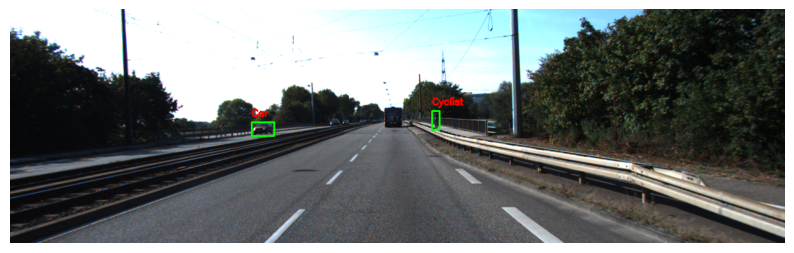

In [9]:
import matplotlib.pyplot as plt

# Visualization function
def visualize_bbox(img_path, boxes, labels):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for box, label in zip(boxes, labels):
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show bounding boxes for a sample image
sample_img = '000001.png'
sample_df = df[df['image'] == sample_img]

img_path = os.path.join(img_folder, sample_img)
boxes = sample_df[['x1', 'y1', 'x2', 'y2']].values
labels = sample_df['class'].values

visualize_bbox(img_path, boxes, labels)


# **Model Training -- YOLOV8**

**Convert Annotations to YOLO Format**

In [10]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Map KITTI class names to class ids for YOLO
class_mapping = {
    'Pedestrian': 0,
    'Car': 1,
    'Cyclist': 2,
    'Truck': 3,
    'DontCare': 4
}

# Create directories for train/val/test splits
os.makedirs('/content/train/images', exist_ok=True)
os.makedirs('/content/val/images', exist_ok=True)
os.makedirs('/content/test/images', exist_ok=True)

os.makedirs('/content/train/labels', exist_ok=True)
os.makedirs('/content/val/labels', exist_ok=True)
os.makedirs('/content/test/labels', exist_ok=True)

 **Load the annotation data (annotations.csv from KITTI)**

In [13]:
annotations = pd.read_csv("/content/kitti_100_annotations.csv")

# Function to convert the annotation to YOLO format
def convert_to_yolo_format(row, image_width, image_height):
    class_id = class_mapping.get(row['class'], -1)
    if class_id == -1:
        return None  # Skip "DontCare" class

    # Convert to YOLO format
    x_center = (row['x1'] + row['x2']) / 2 / image_width
    y_center = (row['y1'] + row['y2']) / 2 / image_height
    width = (row['x2'] - row['x1']) / image_width
    height = (row['y2'] - row['y1']) / image_height

    return f"{class_id} {x_center} {y_center} {width} {height}"

# Split dataset into train/val/test
train_df, test_df = train_test_split(annotations, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

# Convert each annotation to YOLO format and save the labels
def process_images(df, split_type):
    for _, row in df.iterrows():
        # Assuming image dimensions (width x height)
        image_name = row['image']
        image_path = f"/content/images/{image_name}"

        # Read image to get dimensions
        try:
            img = cv2.imread(image_path)
            image_height, image_width, _ = img.shape
        except:
            continue  # Skip if image not found

        yolo_annotation = convert_to_yolo_format(row, image_width, image_height)
        if yolo_annotation:
            label_filename = f"/content/{split_type}/labels/{image_name.replace('.png', '.txt')}"
            with open(label_filename, 'w') as f:
                f.write(yolo_annotation)

            # Copy image to train/val/test folder
            image_dest = f"/content/{split_type}/images/{image_name}"
            shutil.copy(image_path, image_dest)




In [14]:
# Process train, val, and test splits
process_images(train_df, 'train')
process_images(val_df, 'val')
process_images(test_df, 'test')

print("Data conversion to YOLO format completed.")

Data conversion to YOLO format completed.


# **Train YOLOv8 Using Ultralytics**

In [15]:
# Install Ultralytics YOLOv8
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

**Create YAML Configuration File:**

In [16]:
# Create custom YAML configuration
yaml_content = """
train: /content/train/images
val: /content/val/images
test: /content/test/images

nc: 5  # Number of classes (Pedestrian, Car, Cyclist, Truck, DontCare)
names: ['Pedestrian', 'Car', 'Cyclist', 'Truck', 'DontCare']
"""

with open('/content/yolov8_custom.yaml', 'w') as f:
    f.write(yaml_content)

print("YOLOv8 YAML file created.")

YOLOv8 YAML file created.


**Convert KITTI -- YOLO and Organize**

In [26]:
import os
import shutil
import random

# Paths
base_path = "/root/.cache/kagglehub/datasets/klemenko/kitti-dataset/versions/1"
image_dir = os.path.join(base_path, "data_object_image_2/training/image_2")
label_dir = os.path.join(base_path, "data_object_label_2/training/label_2")

output_base = "/content"
splits = ['train', 'val', 'test']
split_ratio = [0.7, 0.2, 0.1]  # 70% train, 20% val, 10% test

# Create output folders
for split in splits:
    os.makedirs(os.path.join(output_base, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(output_base, split, "labels"), exist_ok=True)

# KITTI classes
kitti_classes = ['Pedestrian', 'Car', 'Cyclist', 'Truck', 'DontCare']
class_map = {name: i for i, name in enumerate(kitti_classes)}

# Helper function: Convert KITTI to YOLO format
def kitti_to_yolo(label_path, img_width, img_height):
    yolo_lines = []
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            class_name = parts[0]
            if class_name not in class_map or class_name == 'DontCare':
                continue

            class_id = class_map[class_name]
            bbox_left = float(parts[4])
            bbox_top = float(parts[5])
            bbox_right = float(parts[6])
            bbox_bottom = float(parts[7])

            x_center = (bbox_left + bbox_right) / 2.0 / img_width
            y_center = (bbox_top + bbox_bottom) / 2.0 / img_height
            width = (bbox_right - bbox_left) / img_width
            height = (bbox_bottom - bbox_top) / img_height

            yolo_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
    return yolo_lines

# Load and shuffle filenames
image_filenames = sorted(os.listdir(image_dir))
random.shuffle(image_filenames)
n_total = len(image_filenames)
n_train = int(n_total * split_ratio[0])
n_val = int(n_total * split_ratio[1])

split_ranges = {
    'train': image_filenames[:n_train],
    'val': image_filenames[n_train:n_train + n_val],
    'test': image_filenames[n_train + n_val:]
}

# Move files to folders
from PIL import Image

for split, filenames in split_ranges.items():
    for filename in filenames:
        image_path = os.path.join(image_dir, filename)
        label_name = filename.replace('.png', '.txt')
        label_path = os.path.join(label_dir, label_name)

        # Load image to get width and height
        with Image.open(image_path) as img:
            width, height = img.size

        # Convert label
        yolo_label = kitti_to_yolo(label_path, width, height)

        if len(yolo_label) == 0:
            continue

        # Save image
        shutil.copy(image_path, os.path.join(output_base, split, "images", filename))

        # Save label
        with open(os.path.join(output_base, split, "labels", label_name), 'w') as f:
            f.write('\n'.join(yolo_label))

print(" Dataset organized in YOLO format!")


 Dataset organized in YOLO format!


**Train the Model:**

In [27]:
from ultralytics import YOLO

# Train the YOLOv8 model
model = YOLO('yolov8n.pt')
model.train(data='/content/yolov8_custom.yaml', epochs=10, batch=16, imgsz=640)

print("Training complete.")


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolov8_custom.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

train: Scanning /content/train/labels... 6344 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6344/6344 [00:42<00:00, 147.54it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 112.4±49.0 MB/s, size: 800.9 KB)


val: Scanning /content/val/labels... 1496 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1496/1496 [00:09<00:00, 157.99it/s]

val: New cache created: /content/val/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.17G      1.395      1.768        1.1         35        640: 100%|██████████| 397/397 [02:47<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:23<00:00,  2.01it/s]


                   all       1496       7211      0.625      0.486      0.529      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.19G      1.275      1.111      1.065         39        640: 100%|██████████| 397/397 [02:39<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:21<00:00,  2.20it/s]


                   all       1496       7211      0.675      0.495      0.572      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.21G      1.233     0.9475      1.056         61        640: 100%|██████████| 397/397 [02:39<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:20<00:00,  2.26it/s]


                   all       1496       7211      0.637      0.562      0.597      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.22G      1.189     0.8614      1.037         26        640: 100%|██████████| 397/397 [02:35<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:21<00:00,  2.22it/s]

                   all       1496       7211      0.705      0.572      0.642      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.24G       1.14     0.8024       1.02         27        640: 100%|██████████| 397/397 [02:37<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:21<00:00,  2.23it/s]

                   all       1496       7211      0.746      0.616      0.683      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.26G      1.097     0.7528      1.004         22        640: 100%|██████████| 397/397 [02:39<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:21<00:00,  2.21it/s]

                   all       1496       7211      0.763      0.643      0.716      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.28G      1.063     0.7078     0.9878         15        640: 100%|██████████| 397/397 [02:39<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:20<00:00,  2.24it/s]

                   all       1496       7211      0.786      0.628      0.728      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.28G      1.025     0.6747      0.976         51        640: 100%|██████████| 397/397 [02:37<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:21<00:00,  2.14it/s]

                   all       1496       7211      0.825      0.652      0.757      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.31G     0.9976     0.6469     0.9633         31        640: 100%|██████████| 397/397 [02:37<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:22<00:00,  2.13it/s]

                   all       1496       7211      0.824      0.668      0.763      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.33G     0.9623     0.6203     0.9531         31        640: 100%|██████████| 397/397 [02:36<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:21<00:00,  2.15it/s]


                   all       1496       7211      0.809      0.687      0.772      0.519

10 epochs completed in 0.504 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:20<00:00,  2.27it/s]


                   all       1496       7211      0.809      0.685      0.772      0.519
            Pedestrian        361        943      0.776      0.567      0.666      0.375
                   Car       1319       5719      0.876      0.799      0.896      0.672
               Cyclist        230        323      0.756      0.546      0.646      0.372
                 Truck        213        226      0.827      0.828       0.88      0.657
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train4
Training complete.


# **Test on Image**

Saving photo-1572401611152-cf63d874b019.jpeg to photo-1572401611152-cf63d874b019 (5).jpeg
 Uploaded image: photo-1572401611152-cf63d874b019 (5).jpeg

image 1/1 /content/photo-1572401611152-cf63d874b019 (5).jpeg: 480x640 1 Car, 26.3ms
Speed: 9.3ms preprocess, 26.3ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)


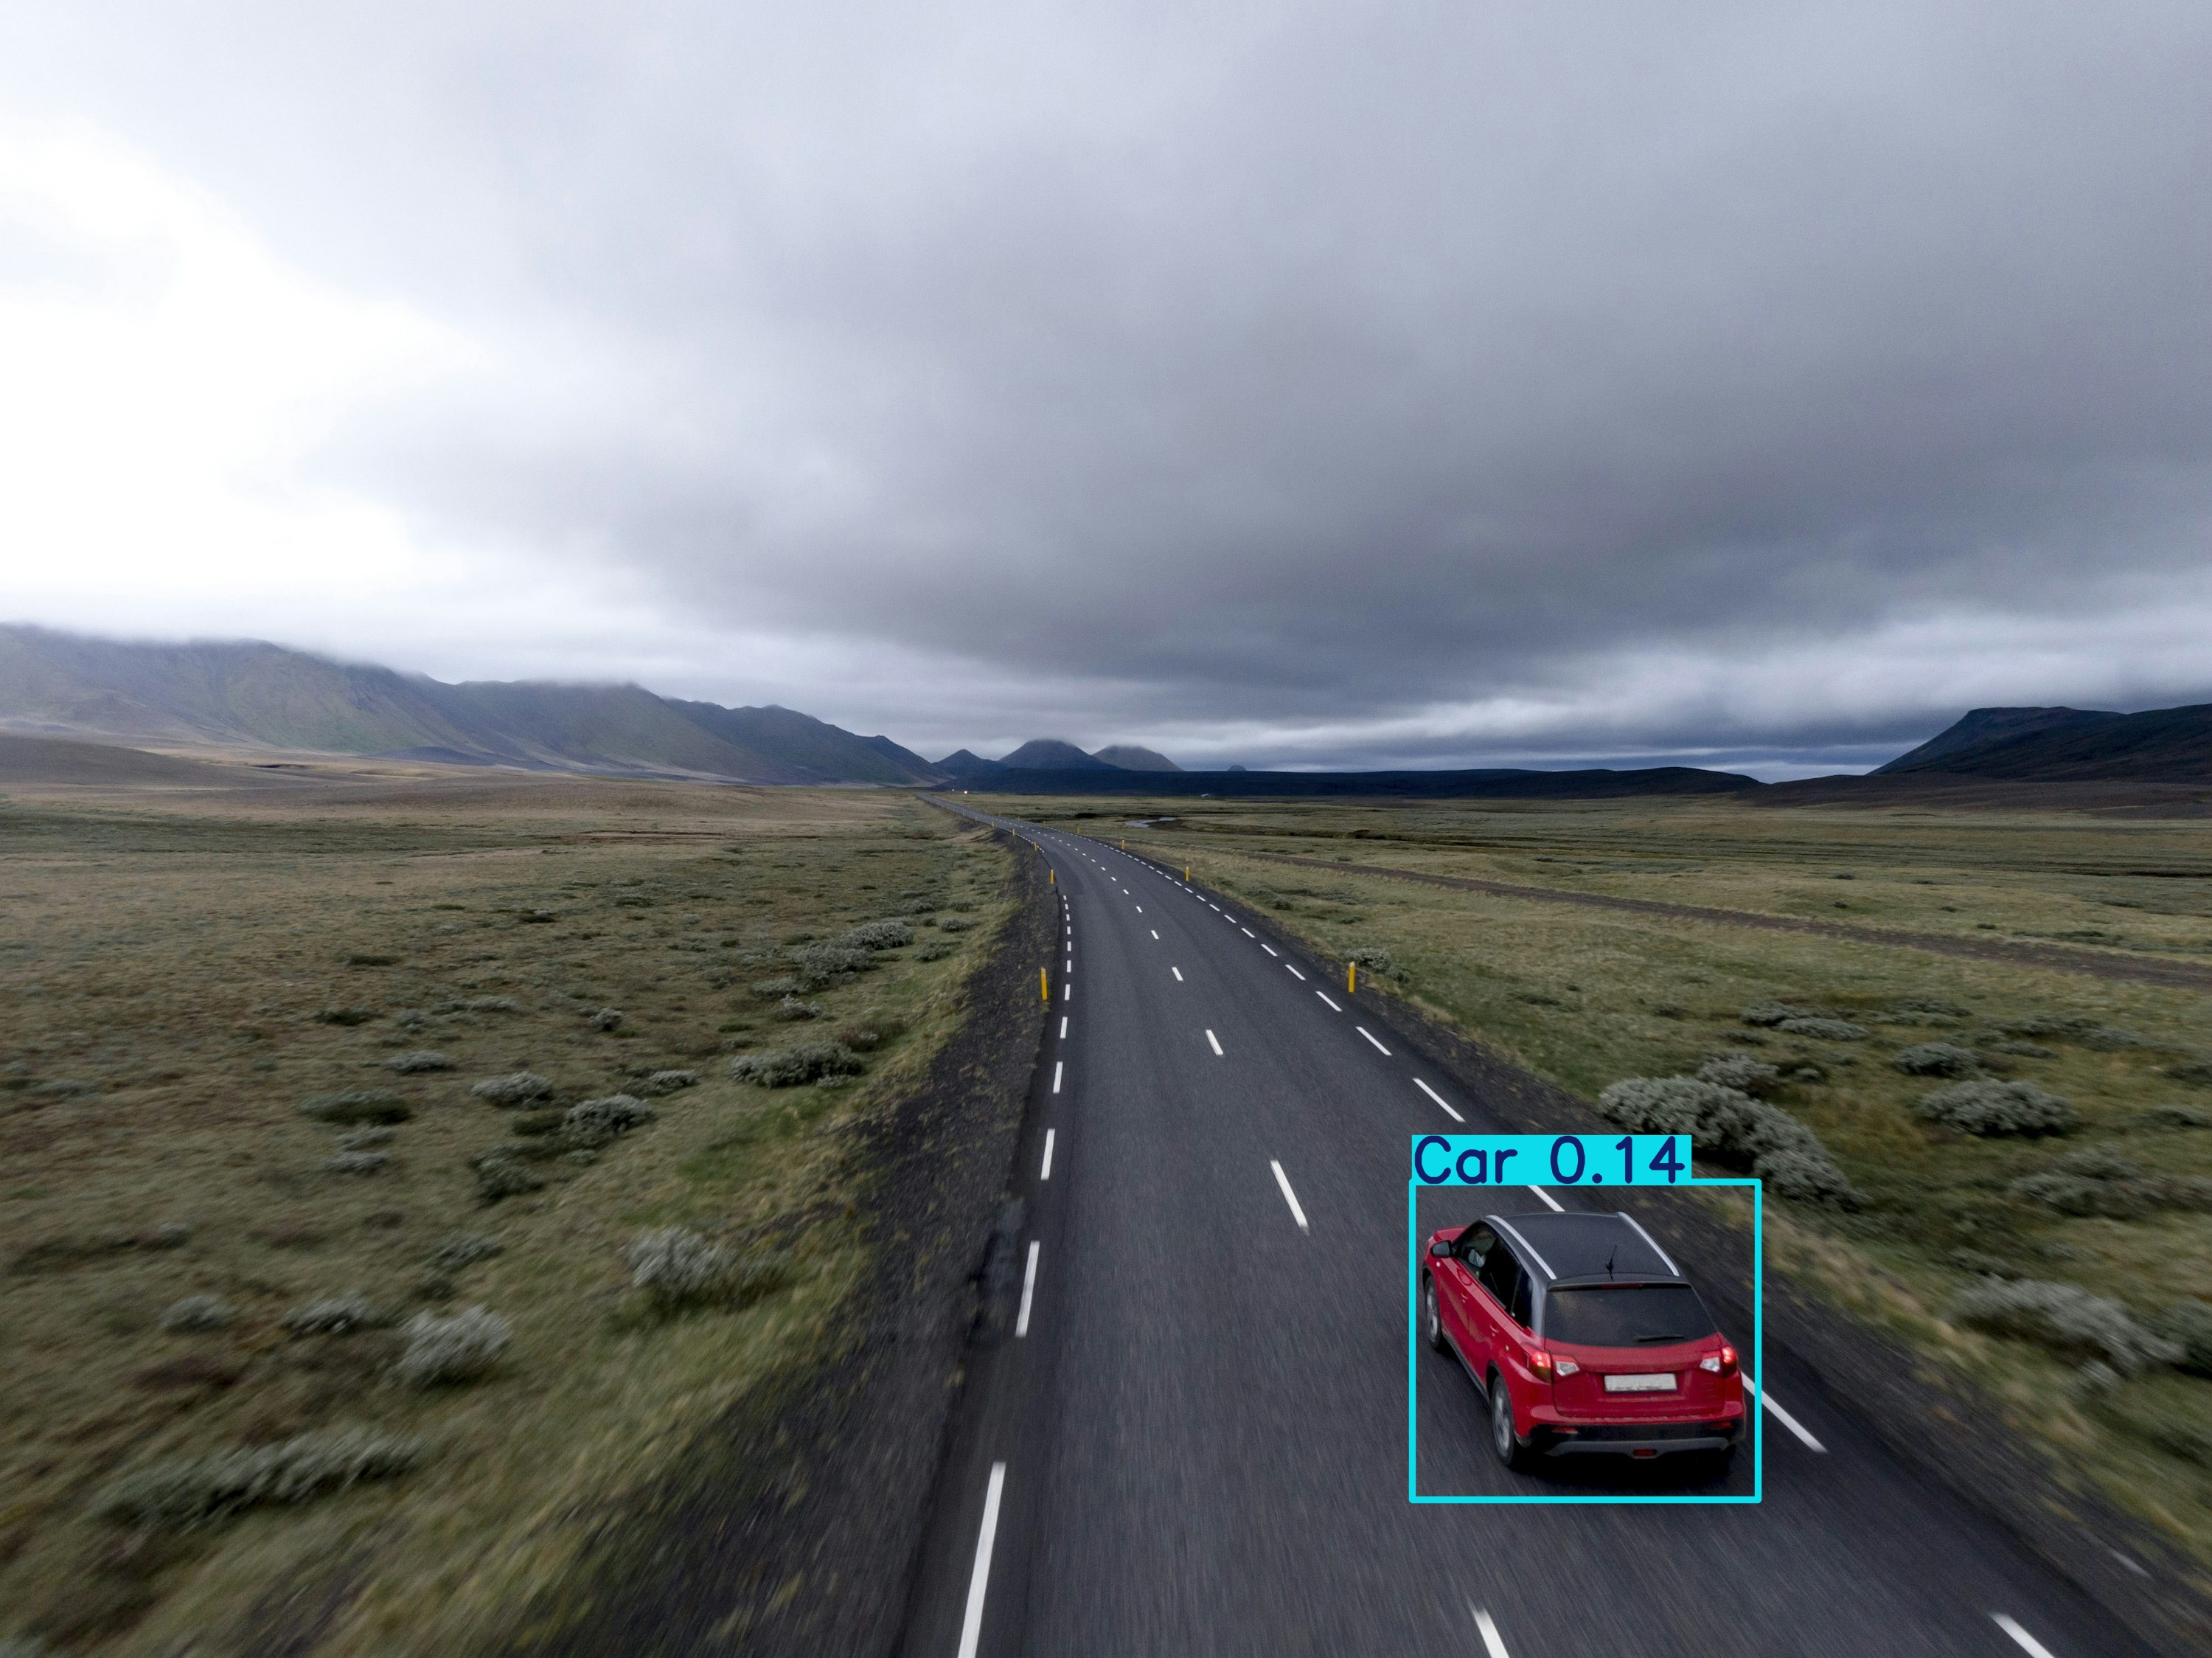

 Detected Objects:


In [46]:
from ultralytics import YOLO
from IPython.display import Image, display
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f" Uploaded image: {image_path}")
model = YOLO("runs/detect/train4/weights/best.pt")

# Run prediction
results = model(image_path, conf=0.1)
result = results[0]

#Save image with detections
result.save(filename="predicted.jpg")
display(Image(filename="predicted.jpg"))

#  Extract predictions as dataframe
df = result.to_df()

#  Show prediction details
if df.empty:
    print(" No objects detected in the image.")
else:
    print(" Detected Objects:")
